In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import tensorflow as tf
from tensorflow.python.keras import layers
from tensorflow.python.keras.callbacks import Callback
from sklearn.model_selection import train_test_split

import functions.parse_data as parse
import functions.models as md
import functions.handy_functions as hf

In [2]:

data_water=parse.parse('cloudrm_water.dat')
data_water=data_water.drop(columns=['Surface_Desc'])


In [3]:

##Train model##
X_labels= ['Cloud_B01','Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
           'Cloud_B07','Cloud_B08','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12','Cloud_B13',
           'Sat_Zenith_Angle','Sun_Zenith_Angle','Azimuth_Diff_Angle','Cloud_Type','Profile_ID','GOT','Water_Vapor']

y_labels=['COT']

df=hf.normalise_input_df(data_water,X_labels)

model, history, X_test,y_test = md.train_simple_model(df,x_labels=X_labels,y_labels=y_labels,split=[0.6,0.2,0.2],epochs=15)






1000/1000 [==============================] - 30s 30ms/step - loss: 23.5721 - mse: 23.5721 - val_loss: 4.8886 - val_mse: 4.8886


In [4]:
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=2)
print(f"Test mse: {test_mse}")

313/313 - 3s - loss: 4.8984 - mse: 4.8984 - 3s/epoch - 8ms/step
Test accuracy: 4.898409366607666


In [5]:
y_predict=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


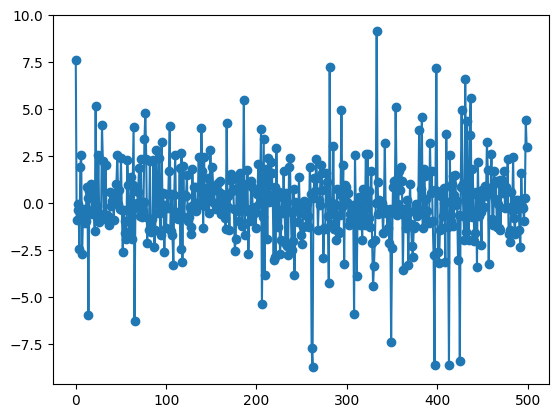

In [6]:
y_test_np=y_test.to_numpy()
plt.plot(y_predict[0:500]-y_test_np[0:500],'-o')
plt.show()